# Benchmarking on LLms 

## Simple Transformer blocks

In [30]:
import pandas as pd
from pathlib import Path
import cs336_systems.benchmark as benchmark 
import cs336_systems.tools as tools
from cs336_basics.model import BasicsTransformerLM # type: ignore

In [6]:
# Load configuration
config_path = Path("../configures/benchmark_config.yaml")
config = benchmark.load_config(config_path)

# Initialize model
model = BasicsTransformerLM(
    vocab_size=config["vocab_size"],
    context_length=config["context_length"],
    d_model=config["d_model"],
    num_layers=config["num_layers"],
    num_heads=config["num_heads"],
    d_ff=config["d_ff"],
    rope_theta=config["rope_theta"],
).to(config["device"])

# Create random batch
batch = benchmark.create_random_batch(
    config["batch_size"],
    config["context_length"],
    config["vocab_size"],
    config["device"]
)

# Run benchmark
forward_time, backward_time = benchmark.benchmark_model(
    model,
    batch,
    config["warmup_steps"],
    config["benchmark_steps"],
    config["forward_only"],
    config["device"]
)

# Print results
print(f"\nBenchmark Results:")
print(f"Model Configuration:")
print(f"  - Layers: {config['num_layers']}")
print(f"  - Model Dimension: {config['d_model']}")
print(f"  - Heads: {config['num_heads']}")
print(f"  - FF Dimension: {config['d_ff']}")
print(f"  - Context Length: {config['context_length']}")
print(f"  - Batch Size: {config['batch_size']}")
print(f"\nTiming Results:")
print(f"  - Average Forward Time: {forward_time*1000:.2f} ms")
if not config["forward_only"]:
    print(f"  - Average Backward Time: {backward_time*1000:.2f} ms")
    print(f"  - Total Time: {(forward_time + backward_time)*1000:.2f} ms")



Benchmark Results:
Model Configuration:
  - Layers: 4
  - Model Dimension: 144
  - Heads: 12
  - FF Dimension: 3072
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 5.80 ms
  - Average Backward Time: 6.35 ms
  - Total Time: 12.15 ms


\begin{tabular}{llrr}
\toprule
 & Name & Age & Salary \\
\midrule
0 & Alice & 25 & 50000 \\
1 & Bob & 30 & 55000 \\
2 & Charlie & 35 & 60000 \\
3 & David & 40 & 65000 \\
4 & Eve & 45 & 70000 \\
\bottomrule
\end{tabular}



In [12]:
import os

def run_benchmark(config_path):
    # Replace this with your actual benchmark function
    print(f"Running benchmark with config: {config_path}")
    config = benchmark.load_config(config_path)

    # Initialize model
    model = BasicsTransformerLM(
        vocab_size=config["vocab_size"],
        context_length=config["context_length"],
        d_model=config["d_model"],
        num_layers=config["num_layers"],
        num_heads=config["num_heads"],
        d_ff=config["d_ff"],
        rope_theta=config["rope_theta"],
    ).to(config["device"])

    # Create random batch
    batch = benchmark.create_random_batch(
        config["batch_size"],
        config["context_length"],
        config["vocab_size"],
        config["device"]
    )

    # Run benchmark
    forward_time, backward_time = benchmark.benchmark_model(
        model,
        batch,
        config["warmup_steps"],
        config["benchmark_steps"],
        config["forward_only"],
        config["device"]
    )

    # Print results
    print(f"\nBenchmark Results:")
    print(f"Model Configuration:")
    print(f"  - Layers: {config['num_layers']}")
    print(f"  - Model Dimension: {config['d_model']}")
    print(f"  - Heads: {config['num_heads']}")
    print(f"  - FF Dimension: {config['d_ff']}")
    print(f"  - Context Length: {config['context_length']}")
    print(f"  - Batch Size: {config['batch_size']}")
    print(f"\nTiming Results:")
    print(f"  - Average Forward Time: {forward_time*1000:.2f} ms")
    if not config["forward_only"]:
        print(f"  - Average Backward Time: {backward_time*1000:.2f} ms")
        print(f"  - Total Time: {(forward_time + backward_time)*1000:.2f} ms")

    return forward_time, backward_time


In [13]:

def test_all_configs():
    config_dir = "../configures"
    config_names = ["small.yaml", "medium.yaml", "large.yaml", "xl.yaml", "2.7B.yaml"]
    for config_name in config_names:
        config_path = os.path.join(config_dir, config_name)
        run_benchmark(config_path)

# Example usage:
test_all_configs()

Running benchmark with config: ../configures/small.yaml

Benchmark Results:
Model Configuration:
  - Layers: 4
  - Model Dimension: 128
  - Heads: 4
  - FF Dimension: 512
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 5.82 ms
  - Average Backward Time: 6.43 ms
  - Total Time: 12.24 ms
Running benchmark with config: ../configures/medium.yaml

Benchmark Results:
Model Configuration:
  - Layers: 8
  - Model Dimension: 256
  - Heads: 8
  - FF Dimension: 1024
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 11.41 ms
  - Average Backward Time: 12.29 ms
  - Total Time: 23.69 ms
Running benchmark with config: ../configures/large.yaml

Benchmark Results:
Model Configuration:
  - Layers: 12
  - Model Dimension: 384
  - Heads: 12
  - FF Dimension: 1536
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 17.10 ms
  - Average Backward Time: 18.20 ms
  - Total Time: 35.30 ms
Running benchmark w

In [14]:
import os
import pandas as pd

def test_all_configs():
    config_dir = "../configures"
    config_names = ["small.yaml", "medium.yaml", "large.yaml", "xl.yaml", "2.7B.yaml"]
    results = {}

    for config_name in config_names:
        config_path = os.path.join(config_dir, config_name)
        forward_times = []
        backward_times = []
        for _ in range(10):
            forward, backward = run_benchmark(config_path)  # Assumes this returns (forward, backward)
            forward_times.append(forward)
            backward_times.append(backward)
        # Use config name (without .yaml) for column prefix
        prefix = os.path.splitext(config_name)[0]
        results[f"{prefix}_forward"] = forward_times
        results[f"{prefix}_backward"] = backward_times

    df = pd.DataFrame(results)
    return df

# Example usage:
df = test_all_configs()
print(df)

Running benchmark with config: ../configures/small.yaml

Benchmark Results:
Model Configuration:
  - Layers: 4
  - Model Dimension: 128
  - Heads: 4
  - FF Dimension: 512
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 5.81 ms
  - Average Backward Time: 6.41 ms
  - Total Time: 12.22 ms
Running benchmark with config: ../configures/small.yaml

Benchmark Results:
Model Configuration:
  - Layers: 4
  - Model Dimension: 128
  - Heads: 4
  - FF Dimension: 512
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 5.77 ms
  - Average Backward Time: 6.33 ms
  - Total Time: 12.10 ms
Running benchmark with config: ../configures/small.yaml

Benchmark Results:
Model Configuration:
  - Layers: 4
  - Model Dimension: 128
  - Heads: 4
  - FF Dimension: 512
  - Context Length: 128
  - Batch Size: 4

Timing Results:
  - Average Forward Time: 5.81 ms
  - Average Backward Time: 6.38 ms
  - Total Time: 12.19 ms
Running benchmark with confi

In [15]:
df

,small_forward,small_backward,medium_forward,medium_backward,large_forward,large_backward,xl_forward,xl_backward,2.7B_forward,2.7B_backward
0,0.005806,0.006414,0.011385,0.012253,0.017250,0.018354,0.022959,0.023796,0.029251,0.048506
1,0.005766,0.006332,0.011366,0.012227,0.017210,0.018379,0.022844,0.023757,0.029224,0.048509
2,0.005813,0.006379,0.011290,0.012121,0.017213,0.018397,0.022967,0.023804,0.029171,0.048521
3,0.005809,0.006388,0.011324,0.012171,0.017169,0.018399,0.022966,0.023820,0.029289,0.048553
4,0.005783,0.006339,0.011407,0.012224,0.017231,0.018389,0.022923,0.023847,0.029266,0.048537
5,0.005794,0.006404,0.011327,0.012137,0.017233,0.018398,0.022860,0.023803,0.029283,0.048525
6,0.005815,0.006431,0.011385,0.012256,0.017200,0.018452,0.022966,0.023844,0.029172,0.048535
7,0.005800,0.006411,0.011376,0.012242,0.017225,0.018366,0.022916,0.023776,0.028960,0.048486
8,0.005827,0.006438,0.011375,0.012247,0.017253,0.018366,0.022964,0.023823,0.029178,0.048528
9,0.005773,0.006290,0.011406,0.012247,0.017243,0.018350,0.022954,0.023805,0.029191,0.048554


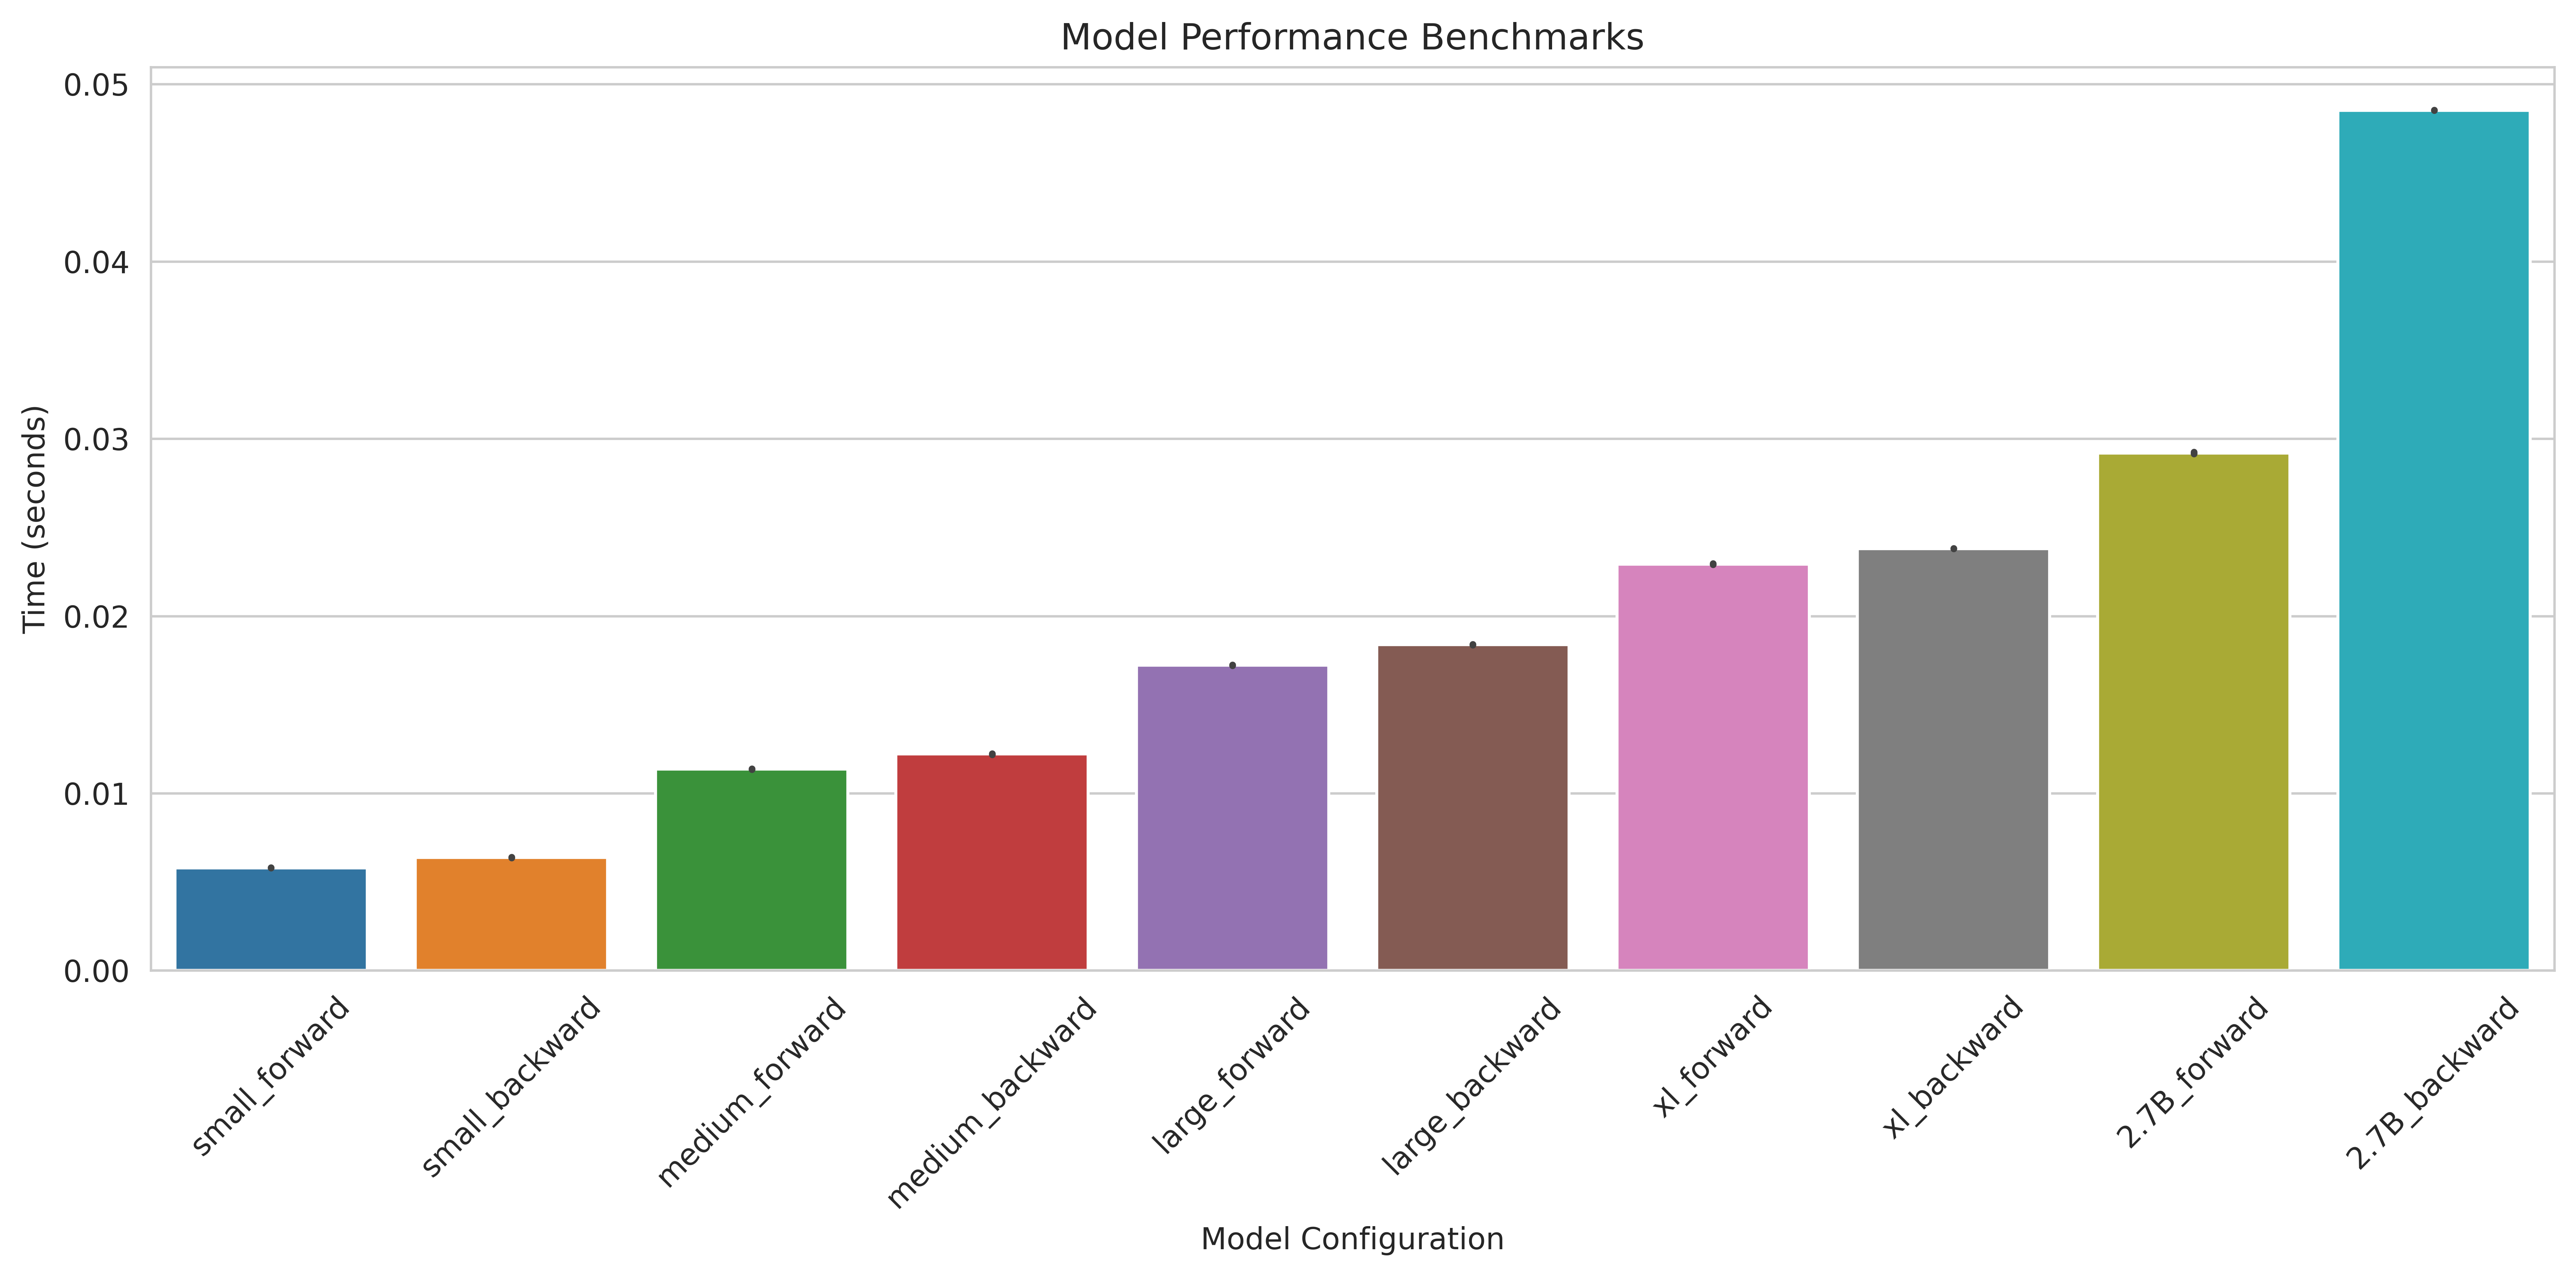

In [22]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 600

plt.figure(figsize=(12, 6))
sns.barplot(data=df)
plt.xticks(rotation=45)
plt.title('Model Performance Benchmarks')
plt.ylabel('Time (seconds)')
plt.xlabel('Model Configuration')
plt.tight_layout()
plt.show()

In [54]:
import yaml
import os
import pandas as pd

def summarize_results(df, config_dir="../configures"):
    summary_rows = []
    config_names = ["small.yaml", "medium.yaml", "large.yaml", "xl.yaml", "2.7B.yaml"]

    for pass_type in ["forward", "backward"]:
        for config_name in config_names:
            prefix = os.path.splitext(config_name)[0]
            col_name = f"{prefix}_{pass_type}"
            times = df[col_name]
            # Load config for this model
            config_path = os.path.join(config_dir, config_name)
            with open(config_path, "r") as f:
                config = yaml.safe_load(f)
            # Prepare summary row, flattening config into columns (with spaces)
            row = {
                "Model Name": prefix,
                "Type of experiments": f"{pass_type} pass",
                "Average time": times.mean(),
                "Standard deviation": times.std(),
                "Median value": times.median()
            }
            # Add each config parameter as a column, replacing _ with space
            for k, v in config.items():
                row[k.replace("_", " ")] = v
            summary_rows.append(row)

    summary_df = pd.DataFrame(summary_rows)
    # Build the column order with config keys replaced
    config_keys = [k.replace("_", " ") for k in config.keys()]
    cols = ["Model Name"]  + ["Average time", "Standard deviation", "Median value"]+ config_keys 
    summary_df = summary_df[cols]
    return summary_df

# Example usage:
summary_df = summarize_results(df)
print(summary_df)

  Model Name  Average time  Standard deviation  Median value  vocab size  \
0      small      0.005799            0.000020      0.005803       10000   
1     medium      0.011364            0.000038      0.011375       10000   
2      large      0.017223            0.000026      0.017228       10000   
3         xl      0.022932            0.000046      0.022956       10000   
4       2.7B      0.029199            0.000095      0.029208       10000   
5      small      0.006383            0.000048      0.006396       10000   
6     medium      0.012212            0.000050      0.012234       10000   
7      large      0.018385            0.000030      0.018384       10000   
8         xl      0.023808            0.000028      0.023805       10000   
9       2.7B      0.048525            0.000021      0.048526       10000   

   context length  d model  num layers  num heads  d ff  rope theta  \
0             128      128           4          4   512     10000.0   
1             128    

In [55]:
summary_df

,Model Name,Average time,Standard deviation,Median value,vocab size,context length,d model,num layers,num heads,d ff,rope theta,batch size,warmup steps,benchmark steps,forward only,device
0,small,0.005799,0.000020,0.005803,10000,128,128,4,4,512,10000.0,4,5,100,False,cuda
1,medium,0.011364,0.000038,0.011375,10000,128,256,8,8,1024,10000.0,4,5,100,False,cuda
2,large,0.017223,0.000026,0.017228,10000,128,384,12,12,1536,10000.0,4,5,100,False,cuda
3,xl,0.022932,0.000046,0.022956,10000,128,512,16,16,2048,10000.0,4,5,100,False,cuda
4,2.7B,0.029199,0.000095,0.029208,10000,128,768,20,16,3072,10000.0,4,5,100,False,cuda
5,small,0.006383,0.000048,0.006396,10000,128,128,4,4,512,10000.0,4,5,100,False,cuda
6,medium,0.012212,0.000050,0.012234,10000,128,256,8,8,1024,10000.0,4,5,100,False,cuda
7,large,0.018385,0.000030,0.018384,10000,128,384,12,12,1536,10000.0,4,5,100,False,cuda
8,xl,0.023808,0.000028,0.023805,10000,128,512,16,16,2048,10000.0,4,5,100,False,cuda
9,2.7B,0.048525,0.000021,0.048526,10000,128,768,20,16,3072,10000.0,4,5,100,False,cuda


In [62]:
import re

def beautify_latex_table_resizable(
    latex_code: str,
    caption_name: str = "Table Caption",
    midrule_lines: list = None,
    colored_rows: list = None,
    group_insertions: list = None,
    resize_to_textwidth: bool = True,
) -> str:
    """
    Beautifies LaTeX code from DataFrame.to_latex() with enhancements:
    - Adds table environment, caption, and bold headers
    - Supports \midrule insertion with priority before group headers
    - Supports \rowcolor for specific rows
    - Supports \multicolumn-based subsection labels with background
    - Optionally wraps content in \resizebox{\textwidth}{!}{...}

    Parameters:
    - latex_code (str): LaTeX string from DataFrame.to_latex()
    - caption_name (str): Caption text for the table
    - midrule_lines (list): Row indices after which to insert \midrule
    - colored_rows (list): List of tuples (row_idx, color_name) to color rows
    - group_insertions (list): List of (row_idx, color, label) for section headers
    - resize_to_textwidth (bool): Wrap with \resizebox if True

    Returns:
    - str: Fully formatted LaTeX table
    """
    midrule_lines = midrule_lines or []
    colored_rows = colored_rows or []
    group_insertions = group_insertions or []

    lines = latex_code.strip().split("\n")

    # Find and bold the header row
    header_idx = next(i for i, line in enumerate(lines) if '&' in line and '\\\\' in line)
    match = re.match(r"(.*?)(\\\\)", lines[header_idx].strip())
    if match:
        content = match.group(1)
        headers = [f"\\textbf{{{col.strip()}}}" for col in content.split("&")]
        lines[header_idx] = " & ".join(headers) + " \\\\"

    data_start = header_idx + 2  # after header and its \midrule

    # Combine all insertions with priority: midrule < rowcolor < group
    insert_actions = []

    for idx in midrule_lines:
        insert_actions.append((idx, "midrule", None))
    for idx, color in colored_rows:
        insert_actions.append((idx, "rowcolor", color))
    for idx, color, label in group_insertions:
        insert_actions.append((idx, "group", (color, label)))

    priority = {"midrule": 0, "rowcolor": 1, "group": 2}

    for idx, kind, val in sorted(insert_actions, key=lambda x: (x[0], priority[x[1]]), reverse=True):
        insert_at = data_start + idx
        if kind == "midrule":
            lines.insert(insert_at, "\\midrule")
        elif kind == "rowcolor":
            lines.insert(insert_at, f"\\rowcolor{{{val}}}")
        elif kind == "group":
            color, label = val
            n_cols = lines[header_idx].count("&") + 1
            group_line = f"\\multicolumn{{{n_cols}}}{{l}}{{\\cellcolor{{{color}}} \\textit{{{label}}}}} \\\\"
            lines.insert(insert_at, group_line)

    # Wrap with \resizebox if needed
    if resize_to_textwidth:
        lines = ["\\resizebox{\\textwidth}{!}{%", *lines, "}"]

    # Wrap in table environment
    return "\n".join([
        "\\begin{table}[h!]",
        "\\centering",
        "\\small",
        "\\setlength{\\tabcolsep}{4pt}",
        *lines,
        f"\\caption{{{caption_name}}}",
        "\\end{table}"
    ])


In [74]:
new_table = summary_df.iloc[:, :11]

In [92]:
# Format the first three columns to 6 significant digits and append 'ms'
formatted = new_table.iloc[:, 1:4].applymap(lambda x: f"{float(x):.6f}ms" if isinstance(x, (int, float)) else str(x) + 'ms')

# If you want to keep the rest of the columns unchanged and concatenate:
result = pd.concat([new_table.iloc[:, 0], formatted,  new_table.iloc[:, 4:]], axis=1)

/tmp/ipykernel_479571/3939860499.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted = new_table.iloc[:, 1:4].applymap(lambda x: f"{float(x):.6f}ms" if isinstance(x, (int, float)) else str(x) + 'ms')


In [102]:
result.iloc[:, 10] = result.iloc[:, 10].astype(int)

In [104]:
result.iloc[:, 10] = result.iloc[:, 10].astype(str)

In [105]:
result

,Model Name,Average time,Standard deviation,Median value,vocab size,context length,d model,num layers,num heads,d ff,rope theta
0,small,0.005799ms,0.000020ms,0.005803ms,10000,128,128,4,4,512,10000
1,medium,0.011364ms,0.000038ms,0.011375ms,10000,128,256,8,8,1024,10000
2,large,0.017223ms,0.000026ms,0.017228ms,10000,128,384,12,12,1536,10000
3,xl,0.022932ms,0.000046ms,0.022956ms,10000,128,512,16,16,2048,10000
4,2.7B,0.029199ms,0.000095ms,0.029208ms,10000,128,768,20,16,3072,10000
5,small,0.006383ms,0.000048ms,0.006396ms,10000,128,128,4,4,512,10000
6,medium,0.012212ms,0.000050ms,0.012234ms,10000,128,256,8,8,1024,10000
7,large,0.018385ms,0.000030ms,0.018384ms,10000,128,384,12,12,1536,10000
8,xl,0.023808ms,0.000028ms,0.023805ms,10000,128,512,16,16,2048,10000
9,2.7B,0.048525ms,0.000021ms,0.048526ms,10000,128,768,20,16,3072,10000


In [106]:
latex_raw = result.iloc[:, :11].to_latex(index=False)
print(beautify_latex_table_resizable(
    latex_code=latex_raw,
    caption_name="Transformers Benchmark",
    midrule_lines=[5],
    colored_rows=[(2, "lightblue"), (7, "lightblue")],
    group_insertions=[
        (0, "lightgray", "Forward Pass"),
        (5, "lightgray", "Backward Pass")
    ],
    resize_to_textwidth=True
))


\begin{table}[h!]
\centering
\small
\setlength{\tabcolsep}{4pt}
\resizebox{\textwidth}{!}{%
\begin{tabular}{llllrrrrrrl}
\toprule
\textbf{Model Name} & \textbf{Average time} & \textbf{Standard deviation} & \textbf{Median value} & \textbf{vocab size} & \textbf{context length} & \textbf{d model} & \textbf{num layers} & \textbf{num heads} & \textbf{d ff} & \textbf{rope theta} \\
\midrule
\multicolumn{11}{l}{\cellcolor{lightgray} \textit{Forward Pass}} \\
small & 0.005799ms & 0.000020ms & 0.005803ms & 10000 & 128 & 128 & 4 & 4 & 512 & 10000 \\
medium & 0.011364ms & 0.000038ms & 0.011375ms & 10000 & 128 & 256 & 8 & 8 & 1024 & 10000 \\
\rowcolor{lightblue}
large & 0.017223ms & 0.000026ms & 0.017228ms & 10000 & 128 & 384 & 12 & 12 & 1536 & 10000 \\
xl & 0.022932ms & 0.000046ms & 0.022956ms & 10000 & 128 & 512 & 16 & 16 & 2048 & 10000 \\
2.7B & 0.029199ms & 0.000095ms & 0.029208ms & 10000 & 128 & 768 & 20 & 16 & 3072 & 10000 \\
\midrule
\multicolumn{11}{l}{\cellcolor{lightgray} \textit{Backwar

In [107]:
print(latex_raw)

\begin{tabular}{llllrrrrrrl}
\toprule
Model Name & Average time & Standard deviation & Median value & vocab size & context length & d model & num layers & num heads & d ff & rope theta \\
\midrule
small & 0.005799ms & 0.000020ms & 0.005803ms & 10000 & 128 & 128 & 4 & 4 & 512 & 10000 \\
medium & 0.011364ms & 0.000038ms & 0.011375ms & 10000 & 128 & 256 & 8 & 8 & 1024 & 10000 \\
large & 0.017223ms & 0.000026ms & 0.017228ms & 10000 & 128 & 384 & 12 & 12 & 1536 & 10000 \\
xl & 0.022932ms & 0.000046ms & 0.022956ms & 10000 & 128 & 512 & 16 & 16 & 2048 & 10000 \\
2.7B & 0.029199ms & 0.000095ms & 0.029208ms & 10000 & 128 & 768 & 20 & 16 & 3072 & 10000 \\
small & 0.006383ms & 0.000048ms & 0.006396ms & 10000 & 128 & 128 & 4 & 4 & 512 & 10000 \\
medium & 0.012212ms & 0.000050ms & 0.012234ms & 10000 & 128 & 256 & 8 & 8 & 1024 & 10000 \\
large & 0.018385ms & 0.000030ms & 0.018384ms & 10000 & 128 & 384 & 12 & 12 & 1536 & 10000 \\
xl & 0.023808ms & 0.000028ms & 0.023805ms & 10000 & 128 & 512 & 16 & 16

## Benchmarking with NVTX

In [108]:
import importlib

# Core libraries
import timeit
import torch
import torch.nn as nn
from typing import Optional, Tuple
import yaml
from pathlib import Path
import pandas as pd
import torch.cuda.nvtx as nvtx

# Custom modules to reload
from cs336_basics import model
from cs336_systems import tools, benchmark
importlib.reload(model)
importlib.reload(tools)
importlib.reload(benchmark)

# Import specific items after reload
from cs336_basics.model import BasicsTransformerLM
from cs336_systems.tools import beautify_latex_table, beautify_latex_table_resizable
from cs336_systems.benchmark import benchmark_model, benchmark_model_with_nvtx, create_random_batch, load_config



: 

## Problem set 1.1.4


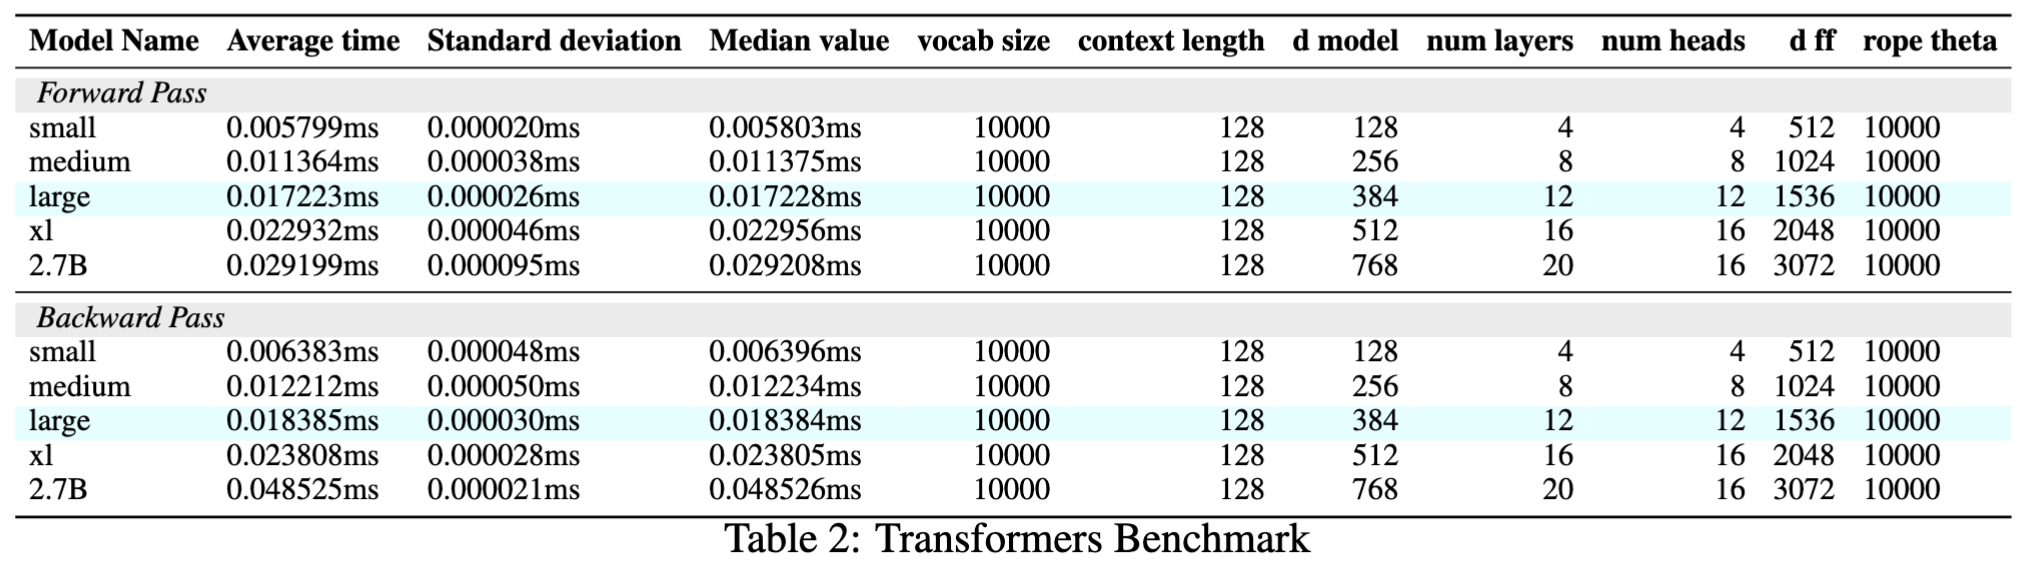

Profile your forward pass, backward pass, and optimizer step using nsys with each of the model sizes described in Table 1 and context lengths of 128, 256, 512 and 1024 (you may run out of memory with some of these context lengths for the larger models, in which case just note it in your report).

(a) What is the total time spent on your forward pass? Does it match what we had measured before with the Python standard library?


Python Result:
Benchmark Results:
Model Configuration:
  - Layers: 12
  - Model Dimension: 768
  - Heads: 12
  - FF Dimension: 3072
  - Context Length: 128
  - Batch Size: 32

Timing Results:
  - Average Forward Time: 83.99 ms
  - Average Backward Time: 166.87 ms
  - Total Time: 250.85 ms

Nsight Result:
82.553ms for Forward Pass.

Their results are very similar, difference by 1.437ms.

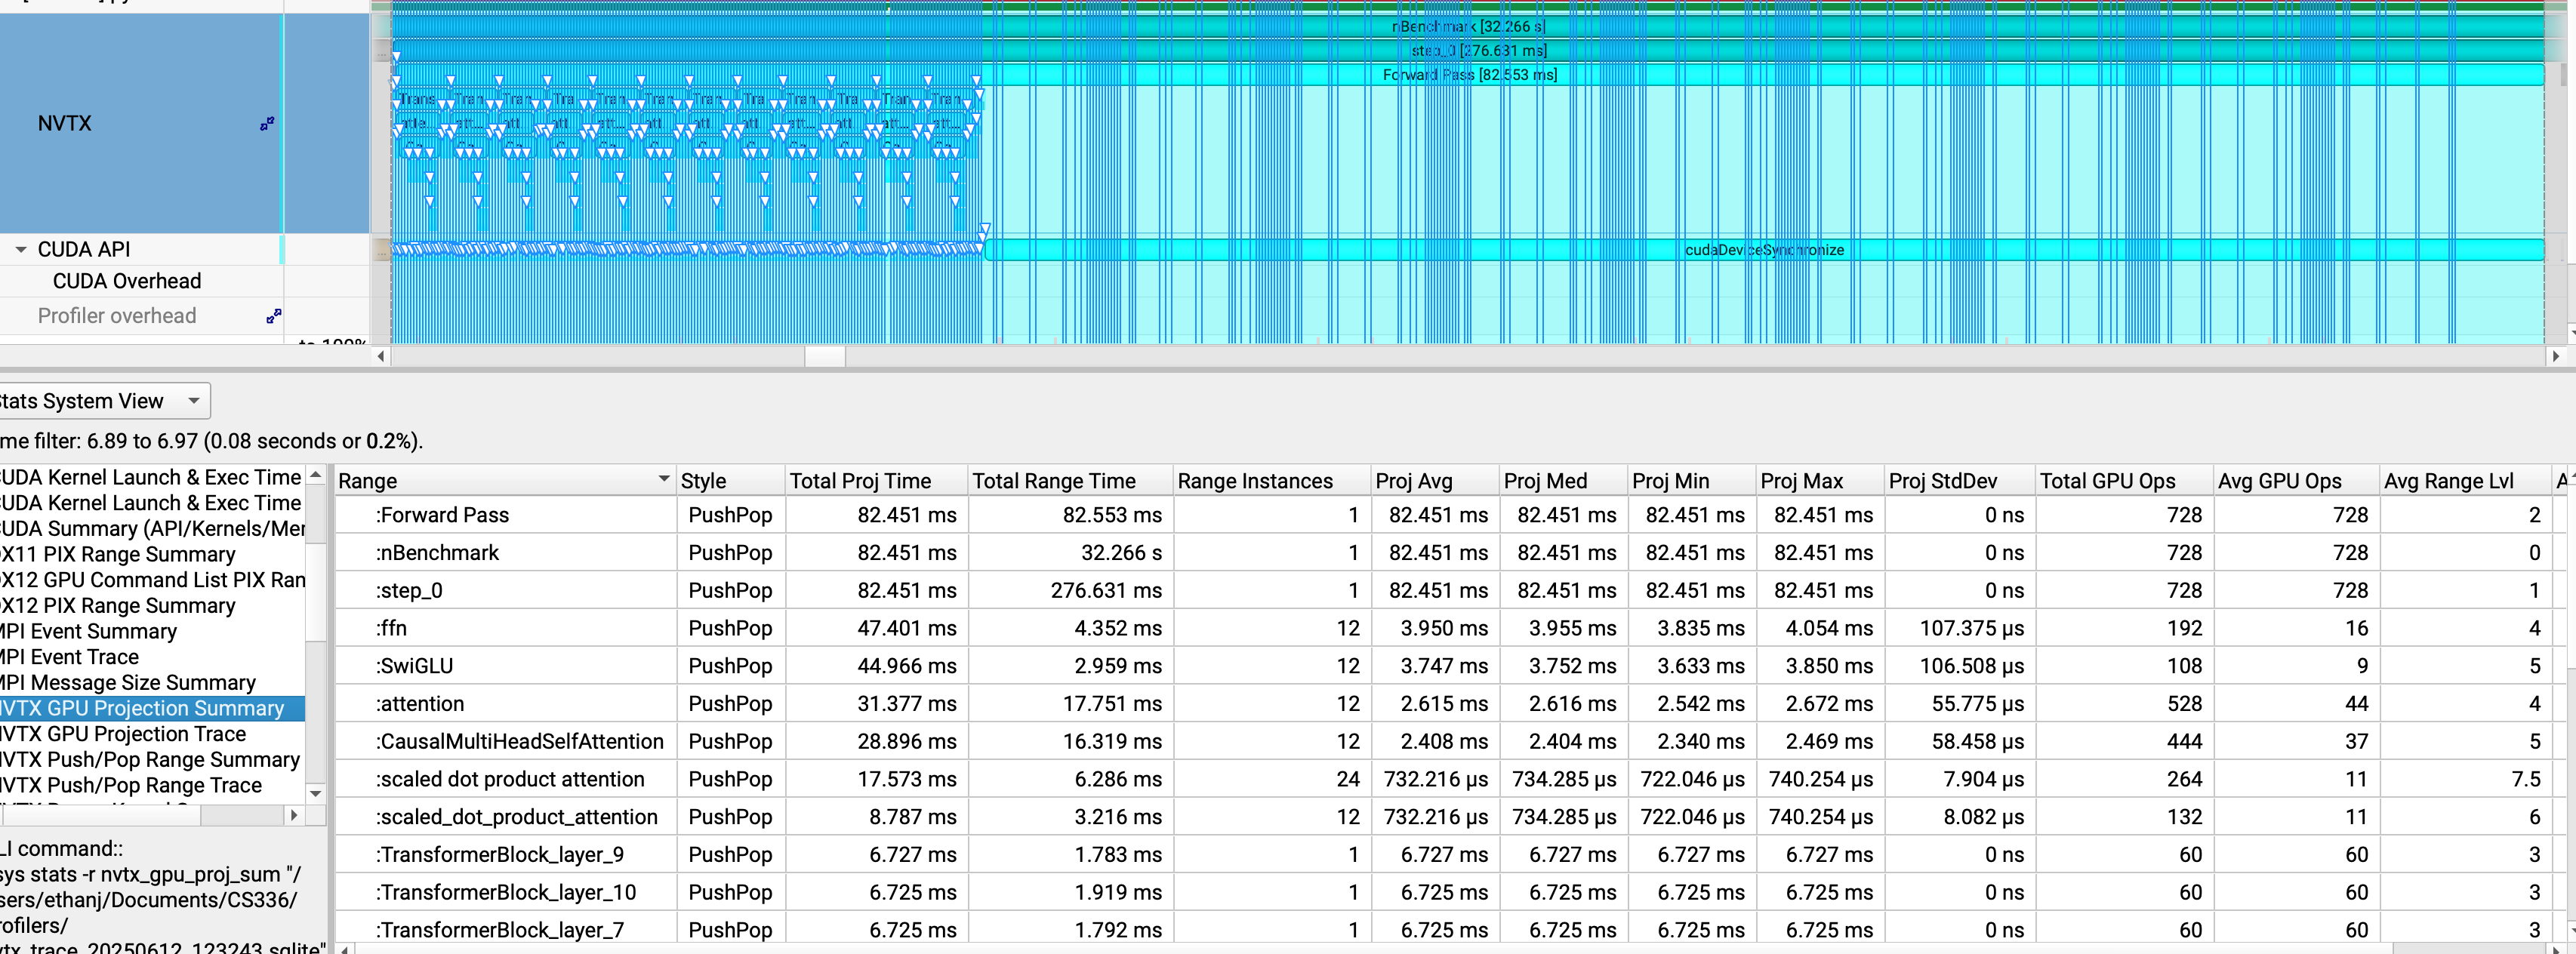


(b) What CUDA kernel takes the most cumulative GPU time during the forward pass? How many times is this kernel invoked during a single forward pass of your model? Is it the same kernel that takes the most runtime when you do both forward and backward passes? (Hint: look at the “CUDA GPU Kernel Summary” under “Stats Systems View”, and filter using NVTX ranges to identify which parts of the model are responsible for which kernels.)

Deliverable: A 1-2 sentence response.

1. In Forward pass, multrix mulpication ampere_sgemm_128x64_tn took the most of time. It invoked 85 times, and took 66.7% of whole running time.

| Time   | Total Time | Instances | Avg        | Med        | Min        | Max        | StdDev     | Name                    |
|--------|------------|-----------|------------|------------|------------|------------|------------|-------------------------|
| 66.7%  | 54.538 ms  | 85        | 641.626 μs | 288.799 μs | 264.095 μs | 3.454 ms   | 491.904 μs | ampere_sgemm_128x64_tn |

2. It is the same kernel that takes the most rutime in Backward Pass. It took 7.541ms around 16.3% of whole runtime. 

| Time   | Total Time | Instances | Avg        | Med        | Min        | Max        | StdDev     | Name                                                                                   |
|--------|------------|-----------|------------|------------|------------|------------|------------|----------------------------------------------------------------------------------------|
| 16.3%  | 7.541 ms   | 12        | 628.376 μs | 621.822 μs | 99.296 μs  | 1.174 ms   | 552.265 μs | ampere_sgemm_128x128_nt                                                               |
| 13.3%  | 6.152 ms   | 6         | 1.025 ms   | 1.020 ms   | 1.013 ms   | 1.044 ms   | 12.602 μs  | void cutlass::Kernel2<cutlass_80_simt_sgemm_128x64_8x5_nn_align1>(T1::Params)         |
| 12.9%  | 5.943 ms   | 4         | 1.486 ms   | 980.636 μs | 971.549 μs | 3.010 ms   | 1.016 ms   | void cutlass::Kernel2<cutlass_80_simt_sgemm_256x128_8x4_nn_align1>(T1::Params)        |
| 12.4%  | 5.717 ms   | 15        | 381.122 μs | 256.287 μs | 253.887 μs | 892.061 μs | 259.244 μs | void cutlass::Kernel2<cutlass_80_simt_sgemm_128x64_8x5_nt_align1>(T1::Params)         |
| 9.7%   | 4.473 ms   | 46        | 97.238 μs  | 56.640 μs  | 1.312 μs   | 220.991 μs | 79.166 μs  | void at::native::vectorized_elementwise_kernel<..., MulFunctor<float>>(...)           |


(c) Although the vast majority of FLOPs take place in matrix multiplications, you will notice that several other kernels still take a non-trivial amount of the overall runtime. What other kernels besides matrix multiplies do you see accounting for non-trivial CUDA runtime in the forward pass?

Deliverable: A 1-2 sentence response.

(d) Profile running one complete training step with your implementation of AdamW (i.e., the forward pass, computing the loss and running a backward pass, and finally an optimizer step, as you’d do during training). How does the fraction of time spent on matrix multiplication change, compared to doing inference (forward pass only)? How about other kernels?

Deliverable: A 1-2 sentence response.

(e) Compare the runtime of the softmax operation versus the matrix multiplication operations within the self-attention layer of your model during a forward pass. How does the difference in runtimes compare to the difference in FLOPs?

Deliverable: A 1-2 sentence response.